### Пакеты и константы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.optimize import minimize

COST = 7.5
PRICE = 12
PRICE_STOCK = 6
QUANTITY_MEAN = 60
QUANTITY_STD = 10
N = 50_000

### Реализация

#### 1. Как вам кажется какая стратегия по покупкам минимизирует ваши риски?
Интуитивно кажется, что недокупить это критичнее чем купить больше, потому что если останутся неиспользованные плавники, то их можно продать и не так много потерять. Поэтому оптимальное количество находится справа от 60.

Для оценки прибыли достаточно оценить один день. При этом эта прибыль зависит только от:
* сколько у нас купят (стохастическая величина) – говорится про нормальное распределение, но оно может принимать отрицательные значения, поэтому генерировать будет до тех пор пока не получим положительное число
* сколько мы купим (наша стратегия)

In [2]:
def calculate_profit(buy_quantity):
    real_quantity = -1
    while real_quantity < 0:
        real_quantity = np.random.normal(
            loc=QUANTITY_MEAN, 
            scale=QUANTITY_STD, 
            size=1,
        )

    if real_quantity >= buy_quantity:
        profit = PRICE * buy_quantity - COST * buy_quantity
    else:
        diff_quantity = buy_quantity - real_quantity
        profit = PRICE * real_quantity - COST * buy_quantity
        profit += diff_quantity * PRICE_STOCK
        profit = profit[0]

    return profit

In [3]:
calculate_profit(60)

270.0

#### 2. Сколько плавников нужно ежедневно покупать у рыбаков, чтобы максимизировать прибыль?

C помощью оптимизационных методов, можно узнать это. минизируем отрицательную прибыль

In [4]:
def calculate_mean_profit(buy_quantity, N=10_000):
    profits = [calculate_profit(buy_quantity) for _ in range(N)]
    return np.mean(profits)


def calculate_inverse_mean_profit(buy_quantity, N=10_000):
    return -calculate_mean_profit(buy_quantity, N)

In [5]:
res = minimize(
    calculate_inverse_mean_profit,
    60, 
    method='nelder-mead', 
    options={'xatol': 1e-8, 'disp': True},
)
buy_quantity_opt = res.x
print(buy_quantity_opt[0])

/Users/akhmed.zarmanbetov/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


69.0117180347429


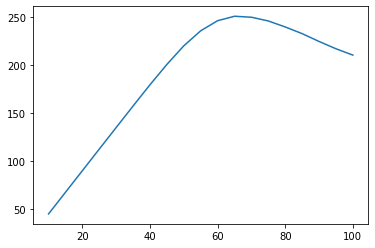

In [6]:
x = np.linspace(10, 100, 19)
y = [calculate_mean_profit(i, N=50_000) for i in x]

plt.plot(x, y);

#### 3. Какова будет мода, медиана, средняя, 10 и 90 перцентиль ежедневной прибыль при вашем оптимальном заказе (естественно оптимальность зависит от вашей стратегии)?

Mode profit: 310.55
Median profit: 256.37
Mean profit: 250.61
10% percentile profit: 180.53
90% percentile profit: 310.55


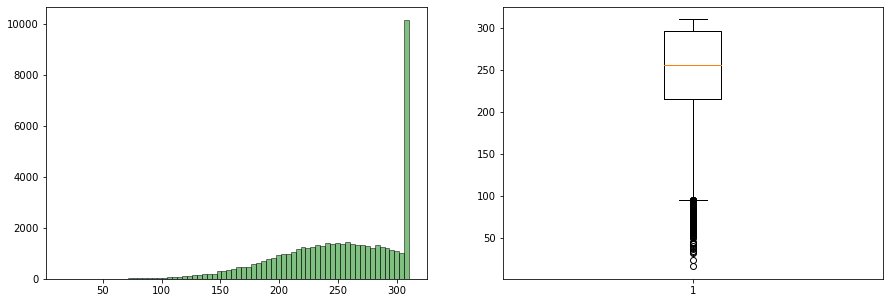

In [7]:
profits = [calculate_profit(buy_quantity_opt[0]) for _ in range(N)]
print(f'Mode profit: {mode(profits).mode[0]:.5}')
print(f'Median profit: {np.median(profits):.5}')
print(f'Mean profit: {np.mean(profits):.5}')
print(f'10% percentile profit: {np.percentile(profits, 10):.5}')
print(f'90% percentile profit: {np.percentile(profits, 90):.5}')

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(profits, bins=70, color = "green", edgecolor = "black", alpha = 0.5)
ax[1].boxplot(profits);

---